# <center><font color=slate>Implementing collections</font></center>

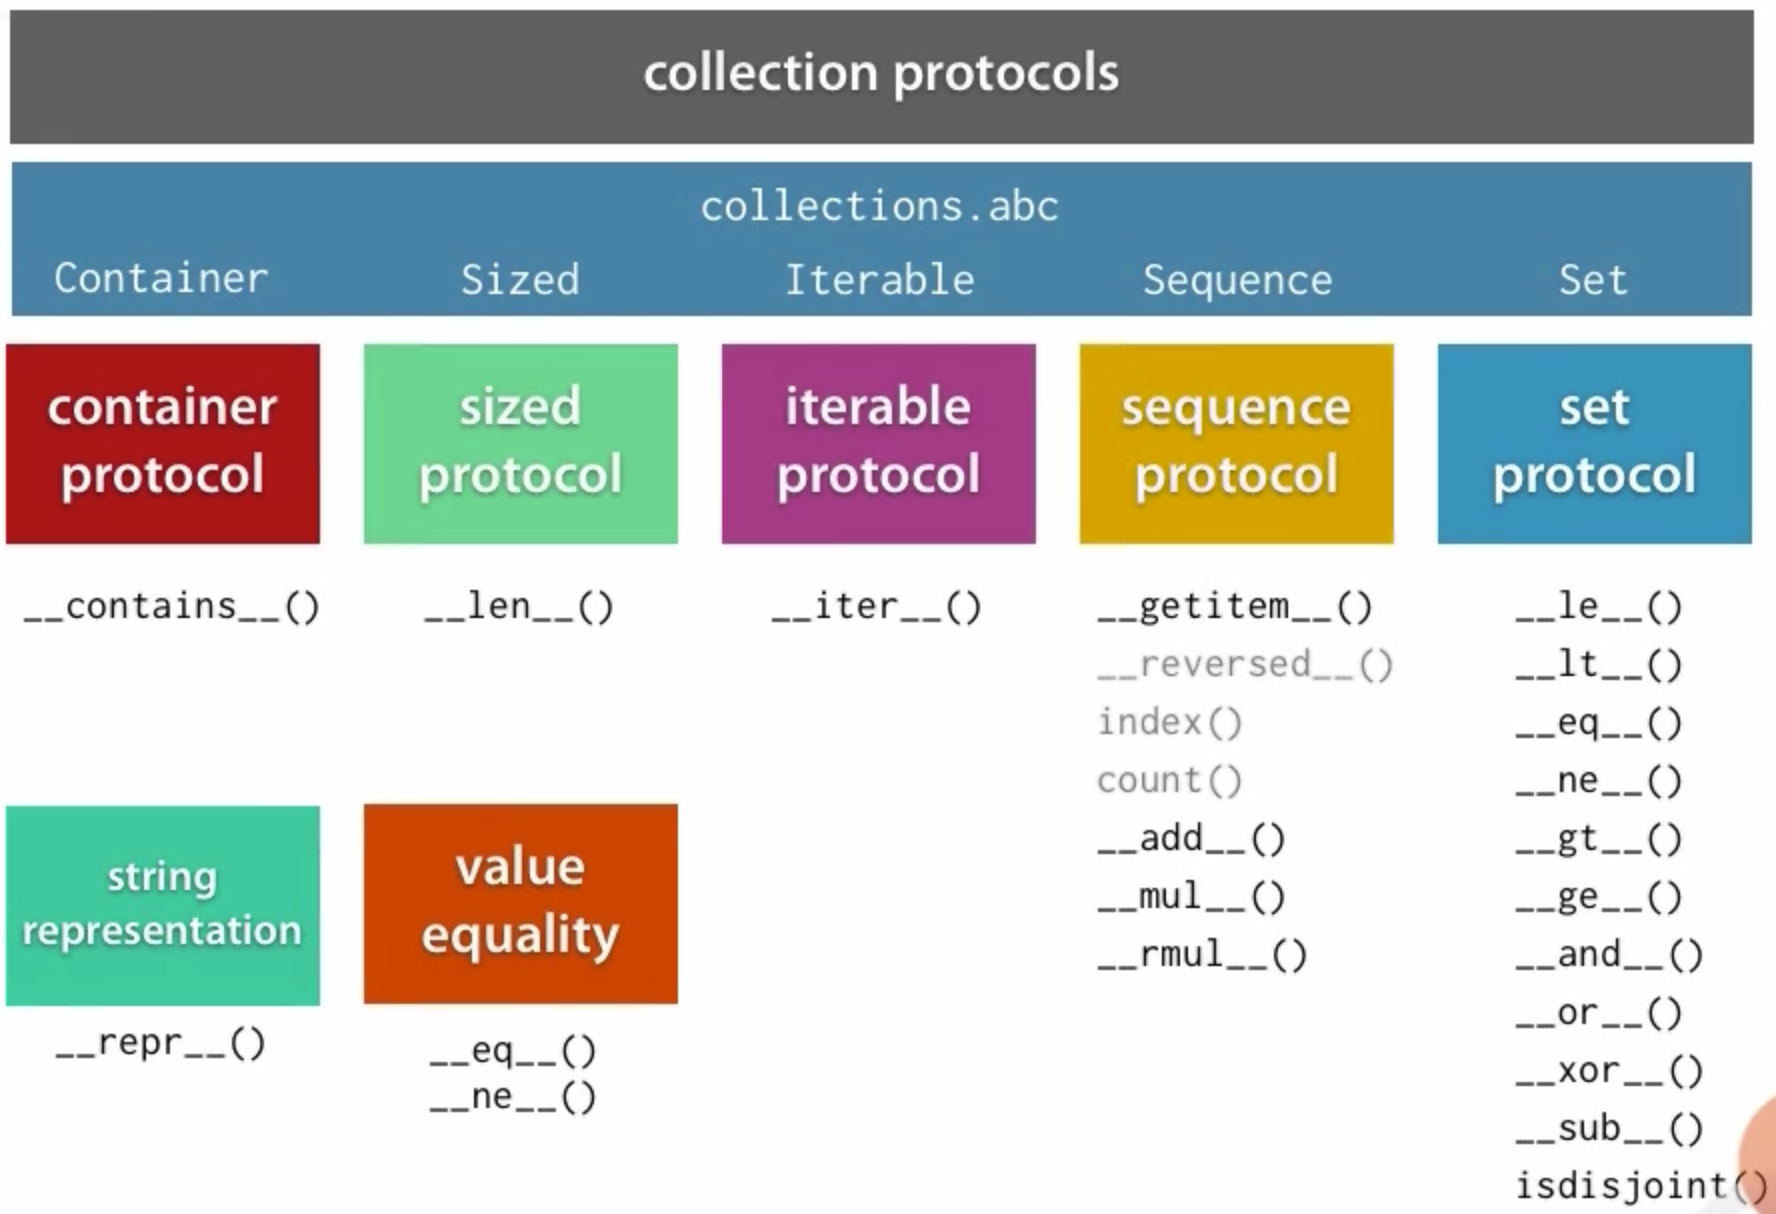

In [26]:
from IPython.core.display import Image, display
display(Image('img/image3.png'))

## <center><font color=tomato>Built-in collections</font></center>
<font color=lightGreen>

|Protocol|Implementing collections|
|--------|------------------------|
|Container|`str, list, dict, range, tuple, set, bytes`|
|Sized|`str, list, dict, range, tuple, set, bytes`|
|Iterable|`str, list, dict, range, tuple, set, bytes`|
|Sequence|`str, list, range, tuple, bytes`|
|Mutable Sequence|`list`|
|Mutable Set|`set`|
|Mutable Mapping|`dict`|

</font>

## <center><font color=tomato>Collection construction</font></center>
In the following exercise which is`container`,`sized`,`iterable`, and,`sequence`of a set of distinct items and constructable from an iterable.

The`SortedSet`will have similar behavior to a regular set, but which stores its items in sorted order and which also supports the sequence protocol for random access

We'll follow a simple test driven development or TDD approach to developing the collection, using unit testing.

Files used: sorted_set.py and test_sorted_set.py

### <font color=lightGreen>The constructive convention</font>
`collection_from_iterable = Collection(iterable)`
`empty_collection = Collection()`

### The<font color=lightGreen> container </font>protocol
>-   Membership testing using <font color=mediumTurquoise>in</font> and <font color=mediumTurquoise>not in</font>
>-   <font color=mediumTurquoise>Special method</font>`__contains__(item)`
>-   <font color=mediumTurquoise>Fallback to</font>`iterable`protocol

Now the more restrictive container protocol is implemented, which is implemented by the special method `__contains__`. `__contains__` accepts a single argument, which is the item to test for and returns boolean. Our `__contains__` implementation will just use the membership test on the enclosed list object

### The<font color=lightGreen> sized </font>protocol
>-   Number of items using `len(sized)` function
>-   Must <font color=mediumTurquoise>not</font> consume or modify the collection
>-   <font color=mediumTurquoise>Special method </font>`__len__()`, which always return a non negative `int`

### The<font color=lightGreen> iterable </font>protocol
>-   Obtain an iterator with `iter(iterable)` function
>-   <font color=mediumTurquoise>Special method</font> `__iter__()`

### <font color=lightGreen>equality</font> and <font color=lightGreen>inequality</font> operator
>-  Equality `lhs == lhs`
>-  <font color=mediumTurquoise>Special method</font> `__eq__(self, rhs)`
>-  `self` argument is `lhs` left-hand-side operator
>-  it is important `return NotImplemented` rather than raise `NotImplementedError`

>-  Inequality `lhs == rhs`
>-  <font color=mediumTurquoise>Special method</font> `__ne__(self, rhs)`
>-  `self` argument is `lhs` left-hand-side operator

### The<font color=lightGreen> sequence </font>protocol
Implies container, sized and iterable

>-   Retrieve slices by slicing `item = seq[index]`
>-   Retrieve slices by slicing `item = seq[start:stop]`
>-   `index` args can be int or `slice(start, stop, step)` object
>-   <font color=mediumTurquoise>Special method</font> `__getitem__()`

We need a sophisticated version of `__getitem__()`, which detects whether it's being called with an index or a slice. It should return a `int` for the indexing and a `SortedSet` for the slicing

>-   Produce a reversal sequence `r = reversed(seq)`
>-   <font color=mediumTurquoise>Fallback to</font> `__getitem__()` and `__len__()`
>-   <font color=mediumTurquoise>Special method</font> `__reversed__()`, in this case there is not need to override the `__reverse__()` because `__getitem__()` and `__len__()` are doing the job

>-   Finds items by value `index = seq.index(item)`
>-   <font color=mediumTurquoise>No special method</font>

The Python Standard Library in the base classes of the collections.abc module (abc is an acronym for abstract base class)
contains many classes which can be inherited from or mixed into our own classes,
taking some of the legwork out of collection protocol implementation.
In this case, the collections.abc.sequence class will provide a whole raft of mix in methods, including index, if we provide implementations of `__getitem__()` and `__len__()`, as we have already done,
We can make SortedSet a subclass of Sequence simply by adding Sequence to the list of base classes at the point we define SortedSet.



>-   Counts items `num = seq.count(item)`
>-   <font color=mediumTurquoise>No special method</font>

Thanks to the inheritance from the sequence abstract base class, this also works immediately

However, the default implementations of methods like `index` and `count` inherited from the base class have no knowledge of the implementation details or characteristics of the data in our concrete class, so may not necessarily be optimally efficient

For example, the inherited index implementation can't exploit the fact that our list is sorted and the inherited count implementation can't exploit the fact that our collection never contains more than one item with a particular value. So we'll always inspect every element even when that's unnecessary

There's a robust implementation in the Python Standard Library in the bisect module. Here's our new override of the count implementation. This uses the bisect left function from the bisect module to search for an item returning the index at which the requested item should be placed in the sequence.

The variable in our new implementation of `count()` represents exactly the same results as would be obtained from the `__contains__()` method,
which we wrote when implementing the container protocol. We can refactor by extracting our efficient search implementation into `__contains__()` and using the membership test within the count method.
The call to bisect and the other tests are moved into `__contains__()`. This replaces the order n complexity list membership test with the much superior order log n test.
The count method is now reduced to simply converting the result from the membership test to an integer.

`index()` method can also benefit from the same technique

Now we have similar code in `index()` and `__contain__()`, we can refactor again, implementing `__contains__()` in terms of index, using a try except block to call index and convert the raised ValueError into a False return value.


>-   Concatenation with + operator
>-   <font color=mediumTurquoise>Special method</font> `__add__()`


>-   Repetition with * operator
>-   <font color=mediumTurquoise>Special methods</font> `__mul__()` and `__rmul__()`- for reverse multiplication

One of the advantages of explicitly implementing the classes in the collections.abc module is that it becomes possible in a simple way to determine whether a class implements a particular collection protocol

The following checks confirm this:

In [27]:
from collections.abc import *
issubclass(list, Sequence)

True

In [28]:
issubclass(list, Sized)

True

In [29]:
issubclass(dict, Mapping)

True

In [30]:
issubclass(dict, Sized)

True

In [31]:
issubclass(dict, Iterable)

True

### The <font color=lightGreen>set</font> protocol
Since we we're implementing a `set` which maintains its elements in sorted order, it seems entirely reasonable that we should support the `set` protocol

Special methods which implement the various set operators, including all the relational operators. These will allow the comparison of sorted set objects in terms of subset and superset relationships.

<font color=mediumTurquoise>Relational operators</font>

|special method|infix operator|set method|meaning|
|-|-|-|-|
|`__le__()`|<=|`issubset()`|subset|
|`__lt__()`|<|-|proper subset|
|`__eq__()`|==|-|equal|
|`__ne__()`|!=|-|not equal|
|`__gt__()`|> |-|proper subset|
|`__ge__()`|>=|`issuperset()`|superset|


Algebraic operators

|special method|infix operator|set method|
|-|-|-|
|`__and__()`|&|`intersection()`|
|`__or__()`|||`union()`|
|`__xor__()`|^|`symetric_difference()`|
|`__sub__()`|-|`difference()`|

The first step is to have sorted `set` inherit from the `set` abstract base class.
We'll use multiple inheritance for this, so it can still inherit from sequence

This requires an additional import from collections.abc